In [37]:
import numpy as np
import wfdb
import gudhi

import gudhi.representations.vector_methods as grvm

In [20]:
record = wfdb.rdrecord(record_name='data_processed/420_test', sampfrom=2000 ,sampto=3000)

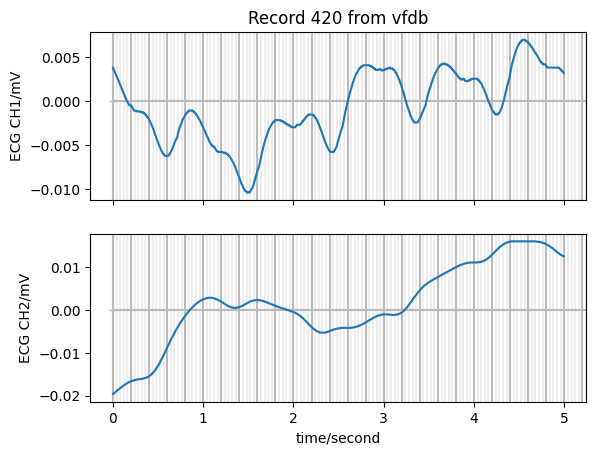

In [21]:
wfdb.plot_wfdb(record=record, title='Record 420 from vfdb', ecg_grids='all')

In [22]:
ecg_data = record.p_signal

In [23]:
print(len(ecg_data))
print(ecg_data)

1000
[[ 0.00379614 -0.01961246]
 [ 0.00361537 -0.01954292]
 [ 0.00352499 -0.01947337]
 ...
 [ 0.00334422  0.01258814]
 [ 0.00325383  0.01251859]
 [ 0.00316345  0.01251859]]


In [24]:
rips_complex = gudhi.RipsComplex(points=ecg_data.reshape(-1, 1))
simplex_tree = rips_complex.create_simplex_tree(max_dimension=1)

In [25]:
persistence = simplex_tree.persistence()

In [ ]:
print(persistence)

In [30]:
type(persistence)

list

<Axes: title={'center': 'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

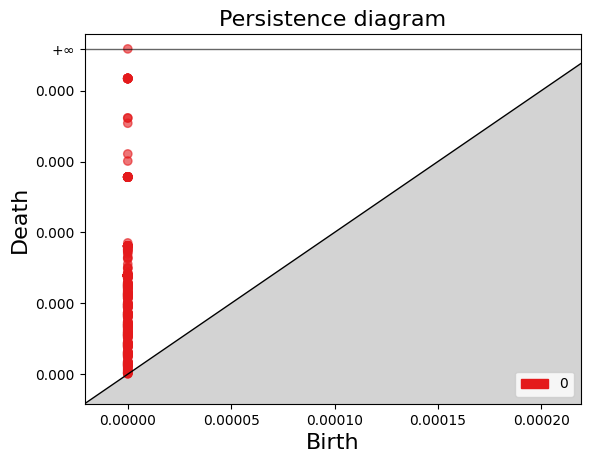

In [27]:
gudhi.plot_persistence_diagram(persistence)

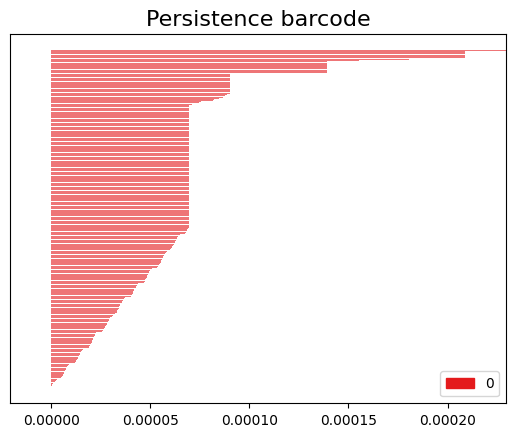

In [29]:
barcode = gudhi.plot_persistence_barcode(persistence)

In [45]:
lives = [p[1] for p in persistence]
births = [b for (b, d) in lives]
deaths = [d for (b, d) in lives]
lives = np.column_stack((births, deaths))

In [51]:
betti_curve_maker = grvm.BettiCurve(sample_range=[0.0, 1.0], resolution=100)

In [52]:
betti_curve = betti_curve_maker(lives)

In [53]:
betti_curve

array([583,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1])